In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Conv2D,
    Flatten,
    Dropout,
    MaxPooling2D,
    MaxPool2D,
)
import pandas as pd
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


In [24]:
path = Path('data')
X_train = np.load(path/'X_train.npy')
y_train = np.load(path/'y_train.npy')
X_test = np.load(path/'X_test.npy')
y_test = np.load(path/'y_test.npy')
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((233, 16, 16, 1), (233, 4), (59, 16, 16, 1), (59, 4))

In [25]:
EPOCHS = 200
BATCH_SIZE = 16
IMG_SIZE = X_train.shape[1]

In [26]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    height_true = y_true[:,3] - y_true[:,1] 
    width_true = y_true[:,2] - y_true[:,0] 

    height_pred = yhat[:,3] - yhat[:,1] 
    width_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(width_true - width_pred) + tf.square(height_true-height_pred))
    
    return delta_coord + delta_size

optimizer = Adam(learning_rate=0.001)

In [27]:
nn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    Flatten(),
    Dense(units=2, activation='relu'),
    Dense(units=4)
])


In [28]:
nn.compile(
    optimizer=optimizer,
    loss=localization_loss,
    # callbacks=[]
    )

In [29]:
history = nn.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), verbose=0)

<AxesSubplot: >

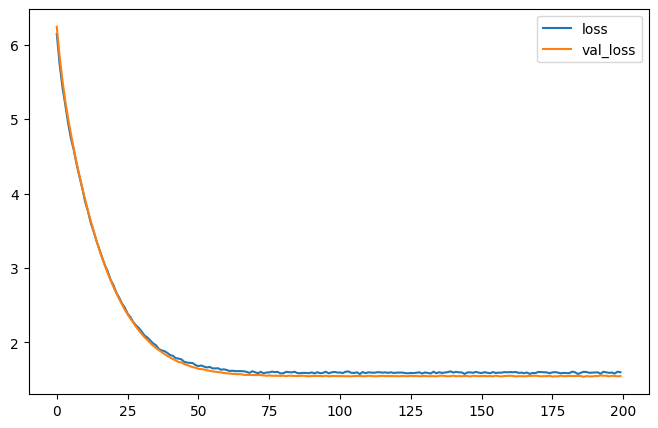

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))


1/1 [==============================] - 0s 58ms/step
[[0.34 0.21 0.29 0.58]]
1/1 [==============================] - 0s 24ms/step
[[0.34 0.21 0.29 0.58]]
1/1 [==============================] - 0s 22ms/step
[[0.34 0.21 0.29 0.58]]
1/1 [==============================] - 0s 24ms/step
[[0.34 0.21 0.29 0.58]]
1/1 [==============================] - 0s 20ms/step
[[0.34 0.21 0.29 0.58]]
1/1 [==============================] - 0s 22ms/step
[[0.34 0.21 0.29 0.58]]


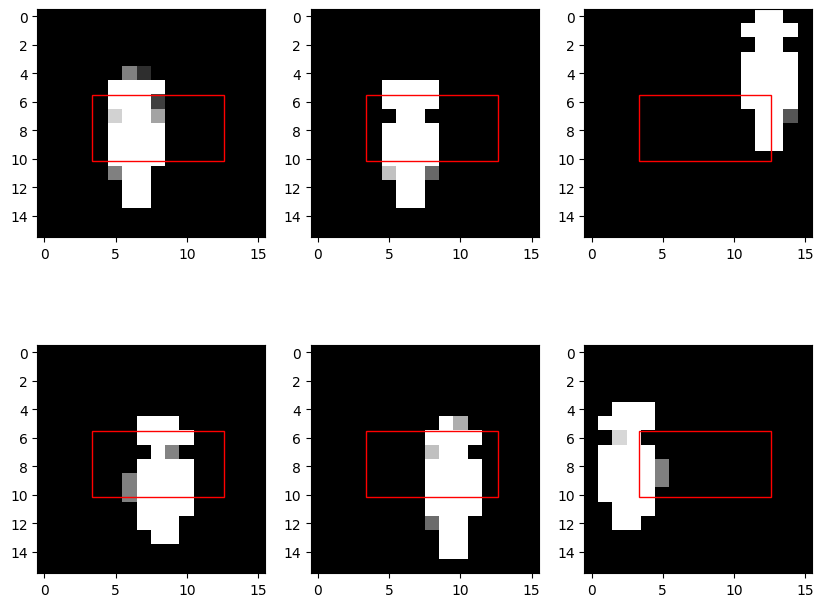

In [31]:
fig, ax = plt.subplots(2, 3, figsize=(10, 8))
images = np.random.choice(X_test.shape[0], 6)

for i in range(2):
    for j in range(3):
        index = np.random.randint(0, X_test.shape[0])
        y_pred = nn.predict(X_test[index].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
        rect = y_pred.reshape(-1, 4)
        print(np.around(rect, 2))
        ax[i, j].add_patch(
            plt.Rectangle(
                (rect[0][1] * IMG_SIZE, rect[0][0] * IMG_SIZE),
                rect[0][3] * IMG_SIZE,
                rect[0][2] * IMG_SIZE,
                fill=False,
                color="red",
            )
        )
        ax[i, j].imshow(X_test[index].reshape(IMG_SIZE, IMG_SIZE), cmap="gray")

plt.show()
